In [50]:
# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [51]:
# Reading CSV into a dataframe
# Link to the dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
# Taking a look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
# Looking at the rows and columns
df.shape

(1338, 7)

In [54]:
# Looking at the datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [90]:
# Looking at the statistics of the dataset
df.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


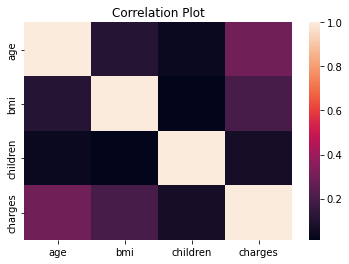

In [55]:
# Looking at the correlation as a heatmap
sns.heatmap(df.corr())
plt.title('Correlation Plot')
plt.show()

In [56]:
# Checking for missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
# Looking at the distribution of the categorical data types
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [58]:
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [59]:
print(df.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Text(0.5, 1.0, 'Gender Distritution')

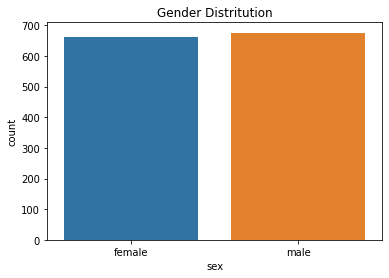

In [60]:
# Visualizing the distribution of the categorical data types
sns.countplot(x='sex', data = df)
plt.title('Gender Distritution')

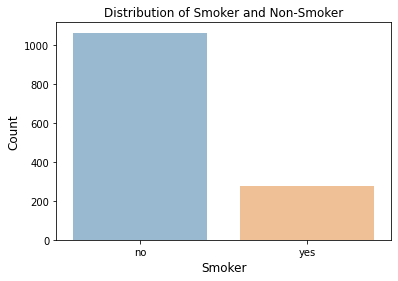

In [61]:
smoker_count  = df['smoker'].value_counts()
sns.barplot(x = smoker_count.index, y= smoker_count.values,  alpha=0.5)
plt.title('Distribution of Smoker and Non-Smoker')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Smoker', fontsize=12)
plt.show()

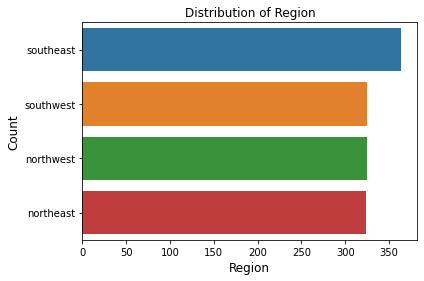

In [62]:
region_count  = df['region'].value_counts()
sns.barplot(x= region_count.values, y = region_count.index,   alpha=1, orient = 'h')
plt.title('Distribution of Region')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()

In [63]:
# Taking a look at the data set again 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
# One hot coding the region, smoker, bmi and sex columns 
region_encoding = pd.get_dummies(df['region'])

In [65]:
region_encoding

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [66]:
# Dropping the region column in the original dataset
df = df.drop('region', axis = 1)
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [67]:
# Joining the one hot coded region encoding into the dataset
df = df.join(region_encoding)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,1


In [69]:
# One hot coding the smoker column
pd.get_dummies(df['smoker'], drop_first = True)

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [71]:
# replacing the smoker column withe the One hot encoded smoker column
df['smoker'] = pd.get_dummies(df['smoker'], drop_first = True)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,16884.92400,0,0,0,1
1,18,male,33.770,1,0,1725.55230,0,0,1,0
2,28,male,33.000,3,0,4449.46200,0,0,1,0
3,33,male,22.705,0,0,21984.47061,0,1,0,0
4,32,male,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,10600.54830,0,1,0,0
1334,18,female,31.920,0,0,2205.98080,1,0,0,0
1335,18,female,36.850,0,0,1629.83350,0,0,1,0
1336,21,female,25.800,0,0,2007.94500,0,0,0,1


In [72]:
# One hot coding the sex column 
pd.get_dummies(df['sex'], drop_first = True)

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [73]:
# Replacing the sex column with the One hot encoded values
df['sex'] =  pd.get_dummies(df['sex'], drop_first = True)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [76]:
# Splitting the dataset into features and targets 
X = df.drop(['charges'], axis = 1)
y = df['charges']

In [77]:
# Looking at the features 
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [78]:
# Looking at the target data
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [79]:
# Splitting the data into 70/30 training/testing ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2)

In [81]:
# Creating the model and fitting the data into the model

from sklearn.linear_model import LinearRegression

# Loading the Linear Regression Model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [82]:
# Making predictions with our dataset.
y_pred = LR.predict(X_test)

In [83]:
# Calculate the coefficients 
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [  244.8081221   -130.83783324   342.39565799   616.71242776
 23341.95158442   667.48898422    84.98958638  -101.63454791
  -650.84402269]


In [84]:
# Calculate the intercept 
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -12250.2554545995


In [85]:
# Calculate the R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.7642348545269875


In [86]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 38108732.489800245


In [87]:
# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 6173.227072593413


In [88]:
# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 4292.580187720696
